# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [11]:
# Import your libraries
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import normaltest
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [9]:
# Your code here
mu, sigma = 50, 5 #Mean and St Dev

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: scipy.stats.normaltest(d))

tests

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (0.10325772490251763, 0.9496812638213092)
1     (1.8996058169625596, 0.3868172543421492)
2    (7.307654486345505, 0.025891844522272334)
3    (3.3113883642734248, 0.19095944904583856)
4     (1.3203036485035882, 0.5167728698811174)
dtype: object

#### Interpret the normaltest results and make your observations.



 Comprueba la normalidad de 4 random samples. Testea la hipótesis nula.

 Con dists, se aplica a toda la serie para generar muestras aleatorias. Después con tests devuelve una tupla con dos 
 números, uno es la suma del z-score del skewtest y la suma del z-score del kurtosis test. Eso mide cuanto difiere
 de la distribución normal. 
 La kurtosis test mide el apuntamiento, es decir, cuánto se concentran los valores en torno a la media. (si la curva de normal distribution es
 más ancha o estrecha)
 El skewness si hay un desplazamiento de los valores a la derecha o a la izquierda de la media.

 El segundo número, es el P-value, que evalúa la hipótesis. ¿Cuánto de probable es que la
 hipótesis nula es verdadera? Cuando el P-value es muy bajo, rechazas la null hypothesis. 
 
 El segundo índice es el que menos normally distributed está, de hecho no lo está. También tiene la suma de z-scored de simetría y kurtosis más alta, por lo que es asimétrico.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

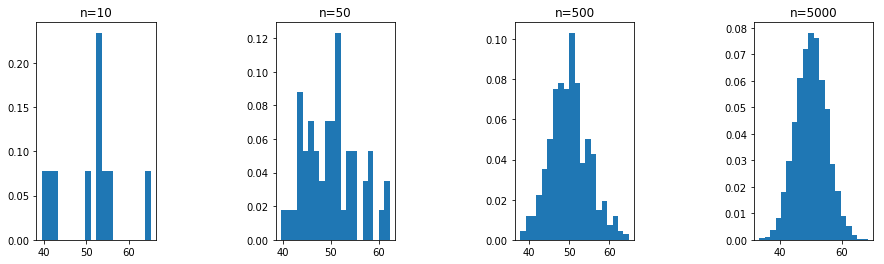

In [12]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Observamos que cuanto más grande es n, o el número de samples, más se acerca la distribución a estar normally distributed. 
Esto es porque cuantos más samples cogemos, el mean of means será más cercano a la media del population. (CLT).

La representación de la media de las muestras tendrá una distribución normal cuantas más muestras se tomen, como podemos ver en los histogramas.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

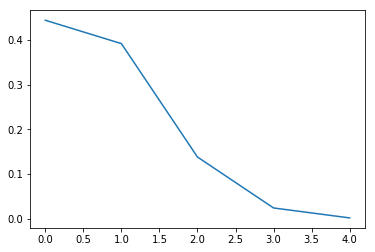

In [13]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

Se está interpolando con persona y media (??)

Observamos que las primeras personas (la persona 0, la persona 1) tienen más probabilidad de pinchar el anuncio de Youtube que las últimas personas (la persona 3  y 4 por ejemplo tienen muy pocas probabilidades de hacerlo)

#### Now plot PMP with 50, 500, and 5000 visitors.

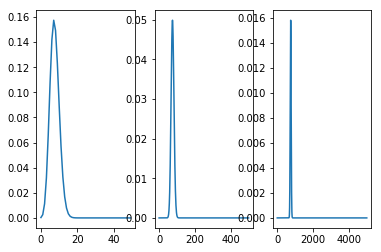

In [29]:
f, ax = plt.subplots(1, 3)

plt.subplot(1,3,1)
n, p = 50, 0.15
x = range(n)
dist = binom(n, p)
# fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
# plt.show()


plt.subplot(1,3,2)
n, p = 500, 0.15
x = range(n)
dist = binom(n, p)
# fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
# plt.show()



plt.subplot(1,3,3)
n, p = 5000, 0.15
x = range(n)
dist = binom(n, p)
# fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
# plt.show()


#### What did you notice from the distribution plots? Comment your findings.

1-. Cuando la n es 50, 9 personas pincharán el anuncio.

2-. Cuando la n es 500, 99 personas pincharán el anuncio.

3-. Cuando la n es 5000, 999 personas pincharán el anuncio.



Cuantos más experimentos hacemos (cuanto más grande es la n) más se acerca a la probabilidad real (0.15). 
Podemos ver en el último caso, cuando n es 5000, la media del sample es la media de la population.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Dada una media de un suceso, qué probabilidad hay que ocurra ese suceso con un valor diferente a la media

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

0.011612348610402475


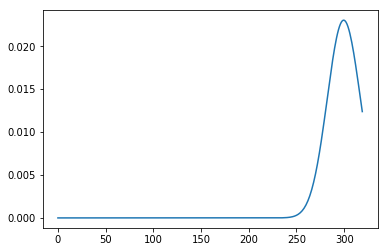

In [36]:
# Your code here

from scipy.stats import poisson

# Probabilidad = poisson.pmf(k, mu, loc)
# Cuando es la propability mass frequency, loc = 0
# loc

# mu = 300
# k = 320

N = np.arange(320)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)

print(poisson.pmf(320, 300))

#### What is the probability of getting 60 visits?

2.622743762294515e-64


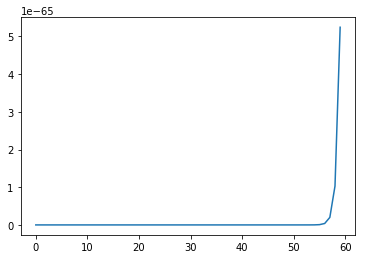

In [35]:
# Your code here

# Probabilidad = poisson.pmf(300, 60)

# mu = 300
# k = 60

N = np.arange(60)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)

print(poisson.pmf(60, 300))

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

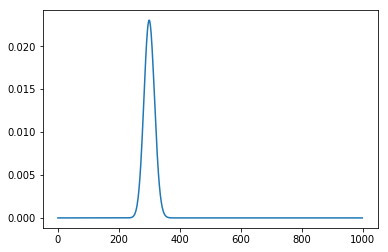

In [30]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)